# Домашнее задание № 5
Дисциплина - Python для инженерии данных  
Тема 5. Классы и объекты (ООП)

In [1]:
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
from re import *

Класс исключений. Реализован исключительно для удобства вывода типа возникающей ошибки.

In [2]:
class ValidationError(Exception):
    def __init__(self, msg):
        self.message = msg

    def __str__(self):
        return self.message

### Задание 1  
Реализуйте базовый класс `Account`, который моделирует поведение банковского счёта. Этот класс должен не только выполнять базовые операции, но и вести детальный учёт всех действий, а также предоставлять аналитику по истории операций.

#### Этап 1. Реализация базового класса Account  
Класс должен быть инициализирован с параметрами:  
- account_holder (str) — имя владельца счёта;  
- balance (float, по умолчанию 0) — начальный баланс счёта, не может быть отрицательным.
  
Атрибуты:  
- _account_counter — приватный атрибут для хранения количества созданных счетов. Отсчет начинается с 1000;
- holder — хранит имя владельца;  
- account_number — хранит номер счёта;  
- _balance — приватный атрибут для хранения текущего баланса;  
- operations_history — список или другая структура для хранения истории операций.  
  
__Важно__:  
Каждая операция должна храниться не просто как число, а как структурированная информация, например, словарь, кортеж или класс. Минимальный набор данных для операции: тип операции ('deposit' или 'withdraw'), сумма, дата и время операции, текущий баланс после операции, статус ('success' или 'fail').

#### Этап 2. Реализация методов  
1. `__init__(self, account_holder, balance=0)` — конструктор. Обратите внимание, что в конструкторе должен автоматически формироваться номер счёта в формате ‘ACC-XXXX’, где XXXX — порядковый номер
счёта;

2. `deposit(self, amount)` — метод для пополнения счёта:
- принимает сумму (должна быть положительной), попытка положить отрицательную сумму, должна вызывать исключение;  
- в случае успеха обновляет баланс и добавляет запись в историю операций.
  
3. `withdraw(self, amount)` — метод для снятия средств:  
- принимает сумму (должна быть положительной);  
- проверяет, достаточно ли средств на счёте, если нет — операция не проходит, но ее попытка с статусом 'fail' все равно фиксируется в истории;  
- в случае успеха обновляет баланс и добавляет запись в историю.
  
4. `get_balance(self)` — метод, который возвращает текущий баланс.
   
5. `get_history(self)` — метод, который возвращает историю операций.Важно: продумайте, в каком формате его вернуть. Для работы с датой и временем используйте модуль `datetime`. Получить текущее время можно с помощью `datetime.now()`.

#### Этап 3. Визуализация истории операций.  
1. Создайте метод `plot_history(self)`, который использует библиотеку Pandas для создания датафрейма из истории операций.  
2. Продумайте, с помощью какой библиотеки можно отобразить изменение баланса с течением времени. Постройте простой линейный график, где по оси X будет время операции, а по оси Y — баланс после каждой операции. График должен иметь заголовок, подписи осей.

In [3]:
# функция для переделывания времени под формат datetime
# а также присваивания текущего времени в случае, если время операции не задано явно
def process_date(d, t):
    if d is None:
        d = datetime.now().date()
        t = datetime.now().time()
    elif t is None:
        if type(d) != date:
                d = datetime.strptime(d, "%Y-%m-%d").date()
        if type(t) != time:
            t = datetime.strptime("12:00:00", "%H:%M:%S").time() 
    else:
        if type(d) != date:
            d = datetime.strptime(d, "%Y/%m/%d").date()
        if type(t) != time:
            t = datetime.strptime(t, "%H:%M:%S").time() 
    return d, t


# Поскольку в таблице с грязными данными время есть в разных форматах,
# реализована функция, которая форматирует время в единый стиль
def process_time_column(x):
    date, time = x.split()
    if "/" in date:
        d, m, y = date.split("/")
        date = f"{y}-{m}-{d}"
    if len(time.split(":")) == 2:
        time += ":00"
    return f"{date} {time}"


class Account:
    # конструктор
    def __init__(self, account_holder, balance=0, counter="ACC-1000"):
        self._account_counter = counter
        self.holder = account_holder
        self._balance = balance
        self.operations_history = []

    # методы печати объекта класса удобны при тестировании
    def __str__(self):
        return f"{self.__class__.__name__}, holder {self.holder}, account {self._account_counter}, balance {self._balance}"

    def __repr__(self):
        return f"{self.__class__.__name__}, holder {self.holder}, account {self._account_counter}, balance {self._balance}"
        
    # метод пополнения счёта
    def deposit(self, amount, date=None, time=None):
        date, time = process_date(date, time)
        try:
            if amount < 0:
                raise ValidationError("Вносимая на счёт сумма не должна быть отрицательной!")
            self._balance += amount
            self.operations_history.append({"type": 'deposit', 
                                            'amount': amount, 
                                            "date": date,
                                            "time": time,
                                            "balance": self._balance, 
                                            "status": 'success'})
        except ValidationError as e:
            print(e)          

    # метод снятия средтсв
    def withdraw(self, amount, date=None, time=None):
        date, time = process_date(date, time)
        try:
            if amount < 0:
                raise ValidationError("Снимаемая со счёта сумма не должна быть отрицательной!")
            if amount > self._balance:
                self.operations_history.append({"type": 'withdraw', 
                                'amount': amount, 
                                "date": date,
                                "time": time,
                                "balance": self._balance, 
                                "status": 'fail'})
                raise ValidationError("На счету недостаточно средств для совершения этой операции!")
            self._balance -= amount
            self.operations_history.append({"type": 'withdraw', 
                                            'amount': amount, 
                                            "date": date,
                                            "time": time,
                                            "balance": self._balance, 
                                            "status": 'success'})
        except ValidationError as e:
            print(e)

    # метод clean_history содержит в себе метод загрузки истории в аккаунт
    # да ещё и делает одно и то же для обоих классов-потомков, поэтому
    # разумно определить его в классе-предке
    def clean_history(self, file, clean_errors=True):
        # методы класса 
        methods = [method for method in dir(self.__class__) if not method.startswith('__')]
        
        data = pd.read_csv(file)
        # приводим формат времени к формату datetime, 
        # параметр coerce переводит некоррректные даты в NaT, такие строки фильтруются   
        data['date'] = data['date'].apply(process_time_column)
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        data = data[data['date'].notna()]
        data['time'] = data['date'].dt.time
        data['date'] = data['date'].dt.date
        
        # коррекция типа операции interest на withdraw
        # по какой-то загадочной причине из таблицы следует, что данная операция является заменой withdraw
        # у меня был выбор: выбросить эти записи или модифицировать их в withdraw, выбран второй вариант
        data['operation'] = data['operation'].apply(lambda x: x if x != 'interest' else 'withdraw')
        
        # оставляем строки с корректно заполненными строками
        mask_1 = data['account_number'] == self._account_counter 
        mask_2 = data['account_type'].str.lower() == self.account_type.lower()
        mask_3 = data["operation"].isin(methods)
        mask_4 = data["status"] == 'success'
        mask_5 = ~pd.isna(data['amount'])
        data = data[mask_1 & mask_2 & mask_3 & mask_4 & mask_5]

        # а теперь применяем операции
        k = 0
        for index, row in data.iterrows():
            k += 1
            # если это самая первая операция, то обновляем баланс счёта в любом случае
            if k == 1 and row['operation'] == 'deposit':
                self._balance = row['balance_after'] - row['amount']
            if row['operation'] == 'deposit':
                self.deposit(row['amount'], row['date'], row['time'])
            elif row['operation'] == 'withdraw':
                self.withdraw(row['amount'], row['date'], row['time'])
            # ВАЖНО! Я не включил проверку, что баланс, определёный программой, совпадает с записью
            # в строке таблицы, а вывел это как предупреждение о несоответствии данных, 
            # поскольку одна малейшая ошибка может впоследствии "запороть" все остальные корректные операции
            # тонкий момент, требующий отдельного обсуждения, как его обрабатывать
            if self._balance != row['balance_after']:
                print("Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!")

    # метод, возвращающий текущий баланс
    def get_balance(self):
        return self._balance

    # метод возвращающий историю операций
    def get_history(self):
        return self.operations_history

    # метод по отображению изменений баланса с течением времени
    def plot_history(self):
        if not self.operations_history:
            print("Нет данных для построения графика")
            return
        
        df = pd.DataFrame(self.operations_history)
        df = df[df["status"] == 'success'][['date', 'balance']]
        df = df.sort_values('date')
        
        # Строим график
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df['balance'], 
                 marker='o', linewidth=2, markersize=4)
        
        plt.title('Изменение баланса счета', fontsize=14, fontweight='bold')
        plt.xlabel('Дата и время операции', fontsize=12)
        plt.ylabel('Баланс счета', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    

Тестирование класса

In [4]:
tester = Account("Tester")
tester.deposit(2000, '2025-01-01')
tester.withdraw(-20, '2025-01-02')
tester.withdraw(1000, '2025-01-03')
tester.withdraw(3000, '2025-01-04')
tester.deposit(2000, '2025-01-05')
tester.withdraw(300, '2025-01-06')
print(tester.get_balance())
for entry in tester.get_history():
    print(entry)

Снимаемая со счёта сумма не должна быть отрицательной!
На счету недостаточно средств для совершения этой операции!
2700
{'type': 'deposit', 'amount': 2000, 'date': datetime.date(2025, 1, 1), 'time': datetime.time(12, 0), 'balance': 2000, 'status': 'success'}
{'type': 'withdraw', 'amount': 1000, 'date': datetime.date(2025, 1, 3), 'time': datetime.time(12, 0), 'balance': 1000, 'status': 'success'}
{'type': 'withdraw', 'amount': 3000, 'date': datetime.date(2025, 1, 4), 'time': datetime.time(12, 0), 'balance': 1000, 'status': 'fail'}
{'type': 'deposit', 'amount': 2000, 'date': datetime.date(2025, 1, 5), 'time': datetime.time(12, 0), 'balance': 3000, 'status': 'success'}
{'type': 'withdraw', 'amount': 300, 'date': datetime.date(2025, 1, 6), 'time': datetime.time(12, 0), 'balance': 2700, 'status': 'success'}


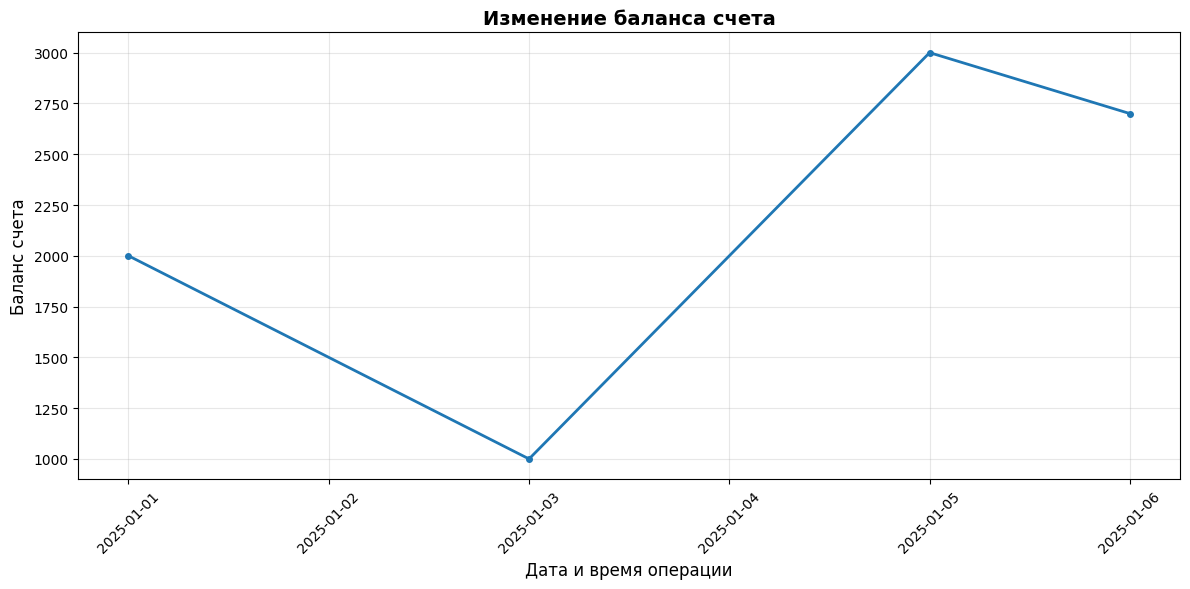

In [5]:
tester.plot_history()

### Задание 2  

#### Этап 4. Реализация наследования
1. Реализуйте два класса `CheckingAccount` (расчётный счёт) и `SavingsAccount` (сберегательный счёт), которые отражают абстракцию базового поведения банковских аккаунтов:
- наследуются от базового класса `Account`;  
- хранят атрибут класса `account_type`.  

2. Класс `SavingsAccount` (сберегательный счёт) дополнительно должен реализовывать метод расчёта процентов на остаток `apply_interest(self, rate)` (например, 7% на остаток).  

3. Класс `SavingsAccount` (сберегательный счёт) позволяет снимать деньги только до определенного порога баланса: нельзя снять больше 50% от баланса. Переопределите метод снятия со счёта.

4. Реализуйте валидацию на отрицательные суммы и корректность имени владельца:  
- имя владельца счёта должно быть в формате «Имя Фамилия» с заглавных букв, кириллицей или латиницей, иначе — должно вызываться исключение;  
- попытка положить отрицательную сумму должна вызывать исключение.

5. Реализуйте метод для анализа истории транзакций по размеру и дате:
- метод должен выводить последние n крупных операций.

In [6]:
# Класс расчётного счёта
class CheckingAccount(Account):
    def __init__(self, account_holder, balance=0, counter="ACC-1000"):
        try:
            super().__init__(account_holder, counter=counter, balance=balance)
            self.account_type = 'Checking'
            if not match(r'^[A-ZА-ЯЁ][a-zа-яё]* [A-ZА-ЯЁ][a-zа-яё]*$', self.holder):
                raise ValidationError("Неверный формат имени!")
            if self._balance < 0:
                raise ValidationError("Стартовый баланс не может быть отрицательным!")
        except ValidationError as e:
            print(e)

    # метод расчёта процента на остаток
    def apply_interest(self, rate=7):
        self._balance = round(self._balance * (100 + rate) / 100, 2)


# Класс сберегательного счёта
class SavingsAccount(Account):
    def __init__(self, account_holder, balance=0, counter="ACC-1000"):
        try:
            super().__init__(account_holder, counter=counter, balance=balance)
            self.account_type = 'Savings'
            if not match(r'^[A-ZА-ЯЁ][a-zа-яё]* [A-ZА-ЯЁ][a-zа-яё]*$', self.holder):
                raise ValidationError("Неверный формат имени!")
            if self._balance < 0:
                raise ValidationError("Стартовый баланс не может быть отрицательным!")
        except ValidationError as e:
            print(e)

    def withdraw(self, amount, date=None, time=None):
        date, time = process_date(date, time)
        try:
            if amount < 0:
                raise ValidationError("Снимаемая со счёта сумма не должна быть отрицательной!")
            if amount > self._balance or 2 * amount > self._balance:
                self.operations_history.append({"type": 'withdraw', 
                                'amount': amount, 
                                "date": date,
                                "time": time,
                                "balance": self._balance, 
                                "status": 'fail'})
                error_type = ["На счету недостаточно средств для совершения этой операции!",
                              "Нельзя снять больше 50% от баланса!"]
                raise ValidationError(error_type[int(2 * amount > self._balance)])
            
            self._balance -= amount
            self.operations_history.append({"type": 'withdraw', 
                                            'amount': amount, 
                                            "date": date,
                                            "time": time,
                                            "balance": self._balance, 
                                            "status": 'success'})
        except ValidationError as e:
            print(e)

    def major_operations_history(self, type="by_amount", min_sum = 10e5, count=10):
        if type == "by_amount":
            return list(filter(lambda x: x["amount"] >= min_sum, self.operations_history))[-count:]
        if type == "last_month":
            return list(filter(lambda x: (datetime.now().date() - x["date"]).days <= 31, 
                               self.operations_history))[-count:]

Тестирование классов

In [7]:
tester = SavingsAccount("Dumbledore")
tester = SavingsAccount("Ron Weasley", -10)
tester = SavingsAccount("Harry Potter", 40_000)
tester.withdraw(30_000, "2020-01-01")
for i in range(1, 5):
    tester.withdraw(i * 1000, f"2025-11-0{i}")
# tester.get_history()
n = 3000
print(f"Операции, превышающие {n}:")
print(*tester.major_operations_history(min_sum=n), sep="\n")
print("-" * 30)
print("Операции в последний месяц:")
print(*tester.major_operations_history(type="last_month"), sep="\n")
print("-" * 30)
tester = CheckingAccount("Hermione Granger", 1000)
tester.deposit(500, date='2000-10-10')
for _ in range(10):
    tester.apply_interest()
print("Финансы через 10 лет накоплений:")
print(tester.get_balance())

Неверный формат имени!
Стартовый баланс не может быть отрицательным!
Нельзя снять больше 50% от баланса!
Операции, превышающие 3000:
{'type': 'withdraw', 'amount': 30000, 'date': datetime.date(2020, 1, 1), 'time': datetime.time(12, 0), 'balance': 40000, 'status': 'fail'}
{'type': 'withdraw', 'amount': 3000, 'date': datetime.date(2025, 11, 3), 'time': datetime.time(12, 0), 'balance': 34000, 'status': 'success'}
{'type': 'withdraw', 'amount': 4000, 'date': datetime.date(2025, 11, 4), 'time': datetime.time(12, 0), 'balance': 30000, 'status': 'success'}
------------------------------
Операции в последний месяц:
{'type': 'withdraw', 'amount': 1000, 'date': datetime.date(2025, 11, 1), 'time': datetime.time(12, 0), 'balance': 39000, 'status': 'success'}
{'type': 'withdraw', 'amount': 2000, 'date': datetime.date(2025, 11, 2), 'time': datetime.time(12, 0), 'balance': 37000, 'status': 'success'}
{'type': 'withdraw', 'amount': 3000, 'date': datetime.date(2025, 11, 3), 'time': datetime.time(12, 0)

### Задание 3  

Перед началом работы загрузите из личного кабинете файлы, на которых можно проверить код с «грязными» данными: `transactions_dirty.csv` и `transactions_dirty.json`.  
  
Реализуйте для классов аккаунтов `CheckingAccount` (расчётный счёт) и `SavingsAccount` (сберегательный счёт) два метода:  
- Метод загрузки истории в аккаунт из файла с транзакциями (файл транзакций общий для всех аккаунтов, необходимо учесть фильтрацию загружаемых значений).  
- Метод clean_history(), который ищет ошибки в данных перед записью транзакций в историю (опечатки, отрицательные суммы, неверные даты). Обратите внимание, что для `SavingsAccount` (сберегательный
счёт) доступно три типа операции (`deposit`, `withdraw` и `interest`), в то время как для `CheckingAccount` (расчётный счёт) доступны только два типа операции (`deposit`, `withdraw`). Все данные с ошибками считаем невалидными и не записываем в историю операций.  
- После загрузки истории операций в аккаунт, баланс счёта должен обновиться.

1. Создаём аккаунты для тех, кто содержится в файле `transactions_dirty.csv`

In [8]:
names = {"Harry Potter", "Hermione Granger", "Ron Weasley", "Neville Longbottom"}

data = pd.read_csv('transactions_dirty.csv')
unique = data[['account_number', 'account_type']].drop_duplicates()
accounts = []
for index, row in unique.iterrows():
    account_number = row['account_number']
    account_type = row['account_type']
    if account_type == "checking":
        accounts.append(CheckingAccount(account_holder=names.pop(), counter=account_number))
    else:
        accounts.append(SavingsAccount(account_holder=names.pop(), counter=account_number))                   
    print(f"Счет: {account_number}, Тип: {account_type}")
print(*accounts, sep="\n")

Счет: ACC-100001, Тип: checking
Счет: ACC-100002, Тип: savings
Счет: ACC-100003, Тип: checking
Счет: ACC-100004, Тип: savings
CheckingAccount, holder Ron Weasley, account ACC-100001, balance 0
SavingsAccount, holder Harry Potter, account ACC-100002, balance 0
CheckingAccount, holder Neville Longbottom, account ACC-100003, balance 0
SavingsAccount, holder Hermione Granger, account ACC-100004, balance 0


In [9]:
for i in range(len(accounts)):
    print(accounts[i])
    accounts[i].clean_history("transactions_dirty.csv")
    print(*accounts[i].get_history(), sep="\n")
    print("-" * 25)

CheckingAccount, holder Ron Weasley, account ACC-100001, balance 0
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблицы!
Предупреждение! Рассчитанная величина баланса не совпадает с ячейкой таблиц